In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Cấu hình
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✅ Import thành công!')

✅ Import thành công!


In [2]:
# Load dữ liệu features (đã normalize)
DATA_DIR = Path('../data/processed')

print("📂 Đang load dữ liệu features...\n")

btc_5m_features = pd.read_csv(DATA_DIR / 'BTCUSDT_5m_features.csv')
eth_5m_features = pd.read_csv(DATA_DIR / 'ETHUSDT_5m_features.csv')
btc_1d_features = pd.read_csv(DATA_DIR / 'BTCUSDT_1d_features.csv')
eth_1d_features = pd.read_csv(DATA_DIR / 'ETHUSDT_1d_features.csv')

# Convert datetime
for df in [btc_5m_features, eth_5m_features, btc_1d_features, eth_1d_features]:
    df['datetime'] = pd.to_datetime(df['datetime'])

print('✅ Load thành công!')
print(f'\n📊 Số lượng dữ liệu:')
print(f'  • BTC 5m: {len(btc_5m_features):,} dòng')
print(f'  • ETH 5m: {len(eth_5m_features):,} dòng')
print(f'  • BTC 1d: {len(btc_1d_features):,} dòng')
print(f'  • ETH 1d: {len(eth_1d_features):,} dòng')

print(f'\n📋 Columns: {list(btc_5m_features.columns)}')

📂 Đang load dữ liệu features...



FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/BTCUSDT_5m_features.csv'

In [ ]:
# Hàm vẽ correlation matrix
def plot_correlation_matrix(df, title, figsize=(14, 12)):
    """
    Vẽ correlation matrix cho các features
    
    Args:
        df: DataFrame chứa features
        title: Tiêu đề biểu đồ
        figsize: Kích thước figure
    """
    # Chọn các cột numeric (bỏ datetime)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Tính correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Vẽ heatmap
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={"shrink": 0.8},
        vmin=-1,
        vmax=1,
        ax=ax
    )
    
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # In ra các correlation mạnh nhất với close
    print(f"\n📊 Correlation với 'close':")
    close_corr = corr_matrix['close'].sort_values(ascending=False)
    for feature, corr_value in close_corr.items():
        if feature != 'close':
            print(f"  • {feature:20s}: {corr_value:+.4f}")
    
    return corr_matrix

print('✅ Hàm plot_correlation_matrix đã sẵn sàng!')

✅ Hàm plot_correlation_matrix đã sẵn sàng!



📊 CORRELATION MATRIX - BTC 5m


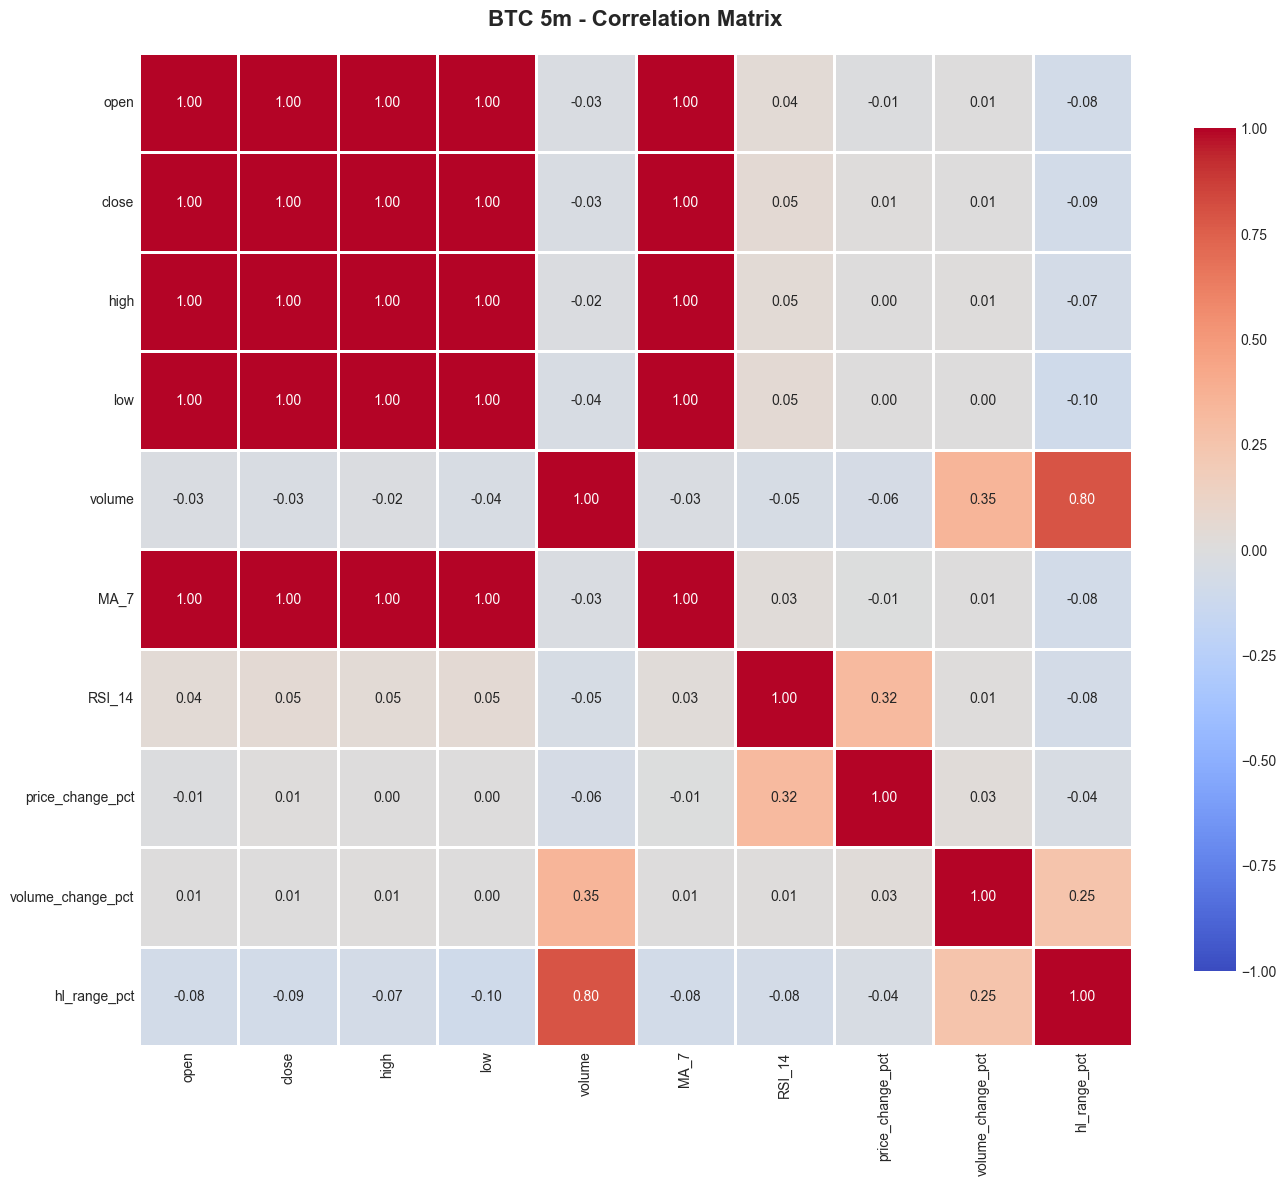


📊 Correlation với 'close':
  • high                : +0.9999
  • low                 : +0.9998
  • open                : +0.9997
  • MA_7                : +0.9995
  • RSI_14              : +0.0499
  • price_change_pct    : +0.0118
  • volume_change_pct   : +0.0059
  • volume              : -0.0325
  • hl_range_pct        : -0.0852


In [ ]:
# Vẽ correlation matrix cho BTC 5m
print("\n" + "="*80)
print("📊 CORRELATION MATRIX - BTC 5m")
print("="*80)

corr_btc_5m = plot_correlation_matrix(
    btc_5m_features,
    'BTC 5m - Correlation Matrix'
)


📊 CORRELATION MATRIX - ETH 5m


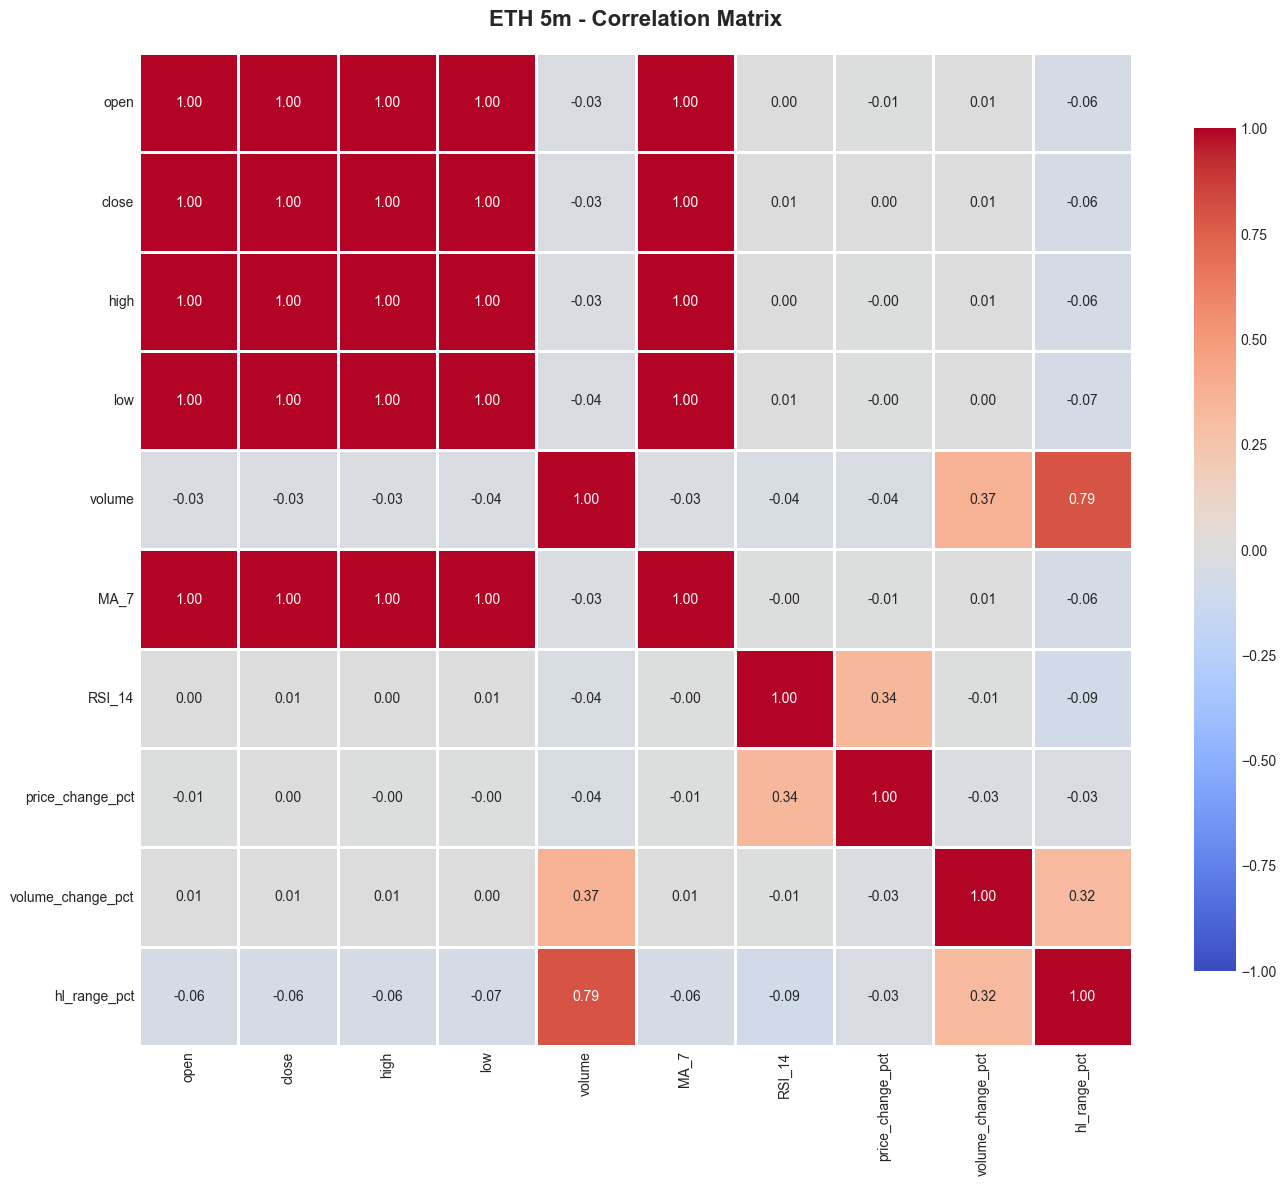


📊 Correlation với 'close':
  • low                 : +1.0000
  • high                : +1.0000
  • open                : +1.0000
  • MA_7                : +0.9999
  • RSI_14              : +0.0059
  • volume_change_pct   : +0.0055
  • price_change_pct    : +0.0018
  • volume              : -0.0317
  • hl_range_pct        : -0.0611


In [ ]:
# Vẽ correlation matrix cho ETH 5m
print("\n" + "="*80)
print("📊 CORRELATION MATRIX - ETH 5m")
print("="*80)

corr_eth_5m = plot_correlation_matrix(
    eth_5m_features,
    'ETH 5m - Correlation Matrix'
)


📊 CORRELATION MATRIX - BTC 1d


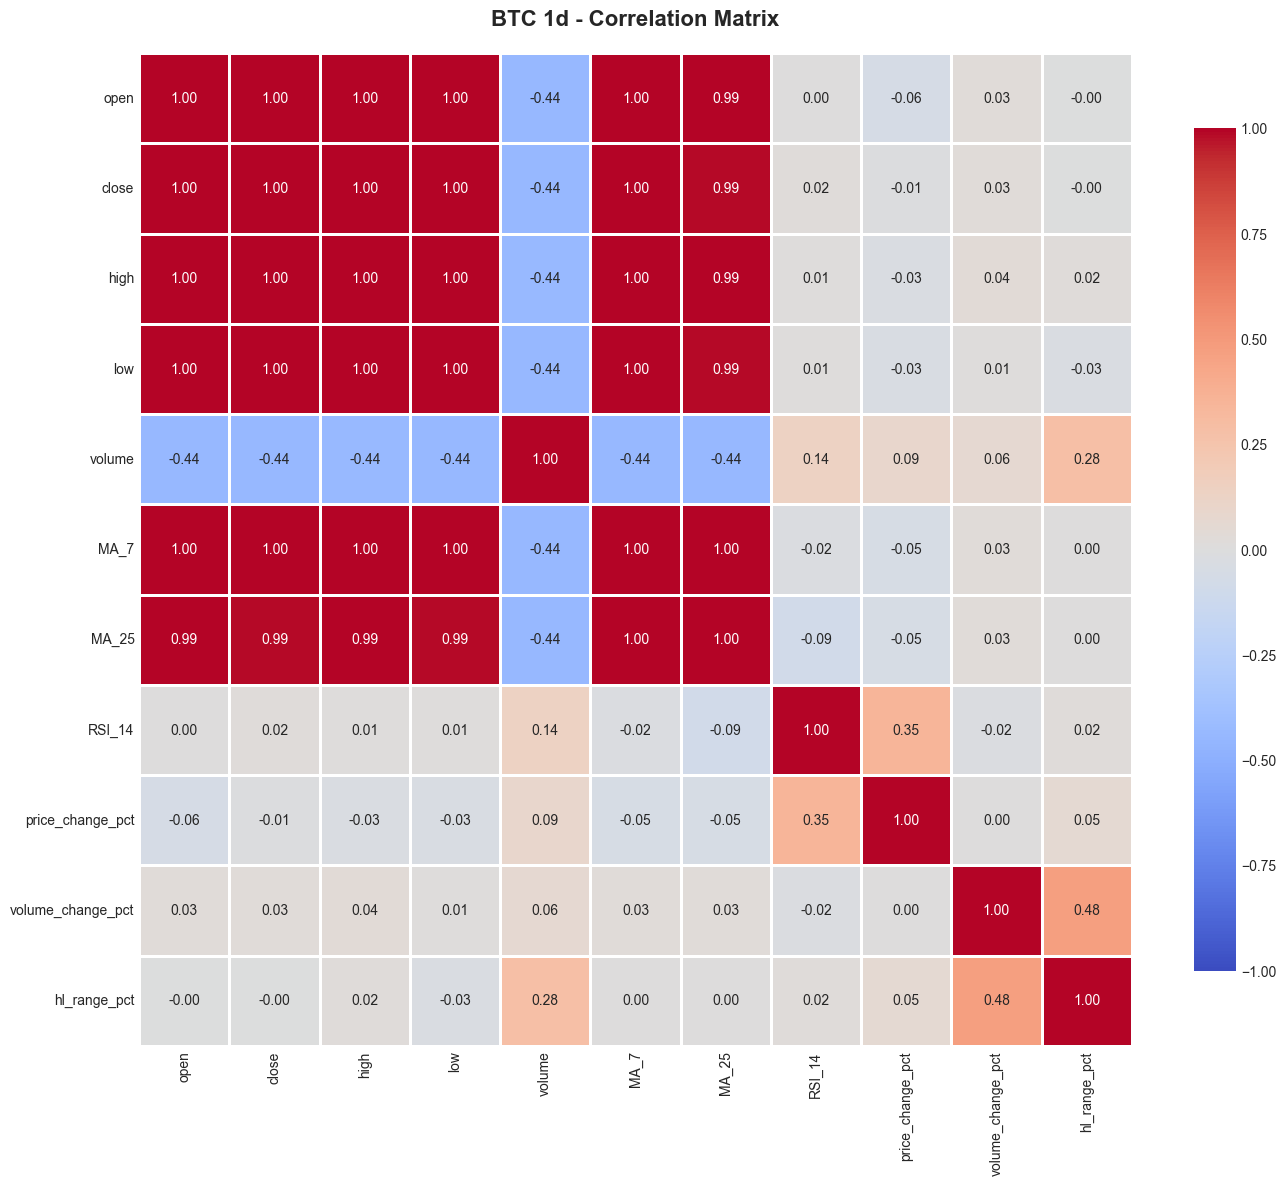


📊 Correlation với 'close':
  • high                : +0.9995
  • low                 : +0.9993
  • open                : +0.9987
  • MA_7                : +0.9979
  • MA_25               : +0.9920
  • volume_change_pct   : +0.0263
  • RSI_14              : +0.0188
  • hl_range_pct        : -0.0012
  • price_change_pct    : -0.0107
  • volume              : -0.4385


In [ ]:
# Vẽ correlation matrix cho BTC 1d
print("\n" + "="*80)
print("📊 CORRELATION MATRIX - BTC 1d")
print("="*80)

corr_btc_1d = plot_correlation_matrix(
    btc_1d_features,
    'BTC 1d - Correlation Matrix'
)


📊 CORRELATION MATRIX - ETH 1d


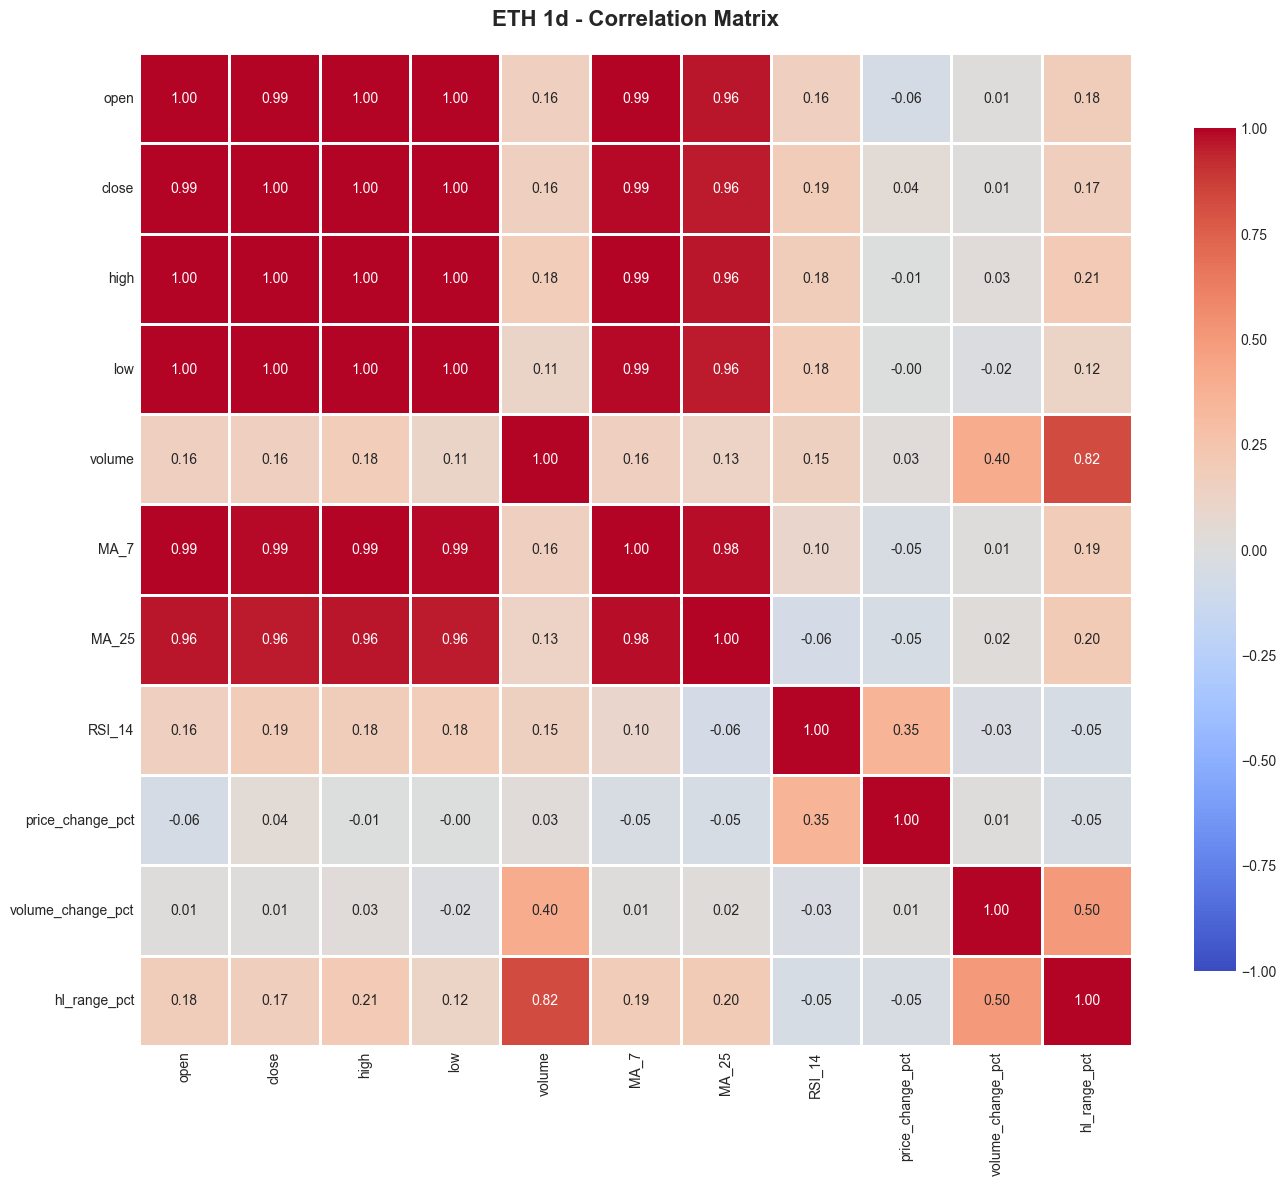


📊 Correlation với 'close':
  • high                : +0.9979
  • low                 : +0.9969
  • open                : +0.9943
  • MA_7                : +0.9897
  • MA_25               : +0.9590
  • RSI_14              : +0.1924
  • hl_range_pct        : +0.1692
  • volume              : +0.1572
  • price_change_pct    : +0.0403
  • volume_change_pct   : +0.0088


In [ ]:
# Vẽ correlation matrix cho ETH 1d
print("\n" + "="*80)
print("📊 CORRELATION MATRIX - ETH 1d")
print("="*80)

corr_eth_1d = plot_correlation_matrix(
    eth_1d_features,
    'ETH 1d - Correlation Matrix'
)

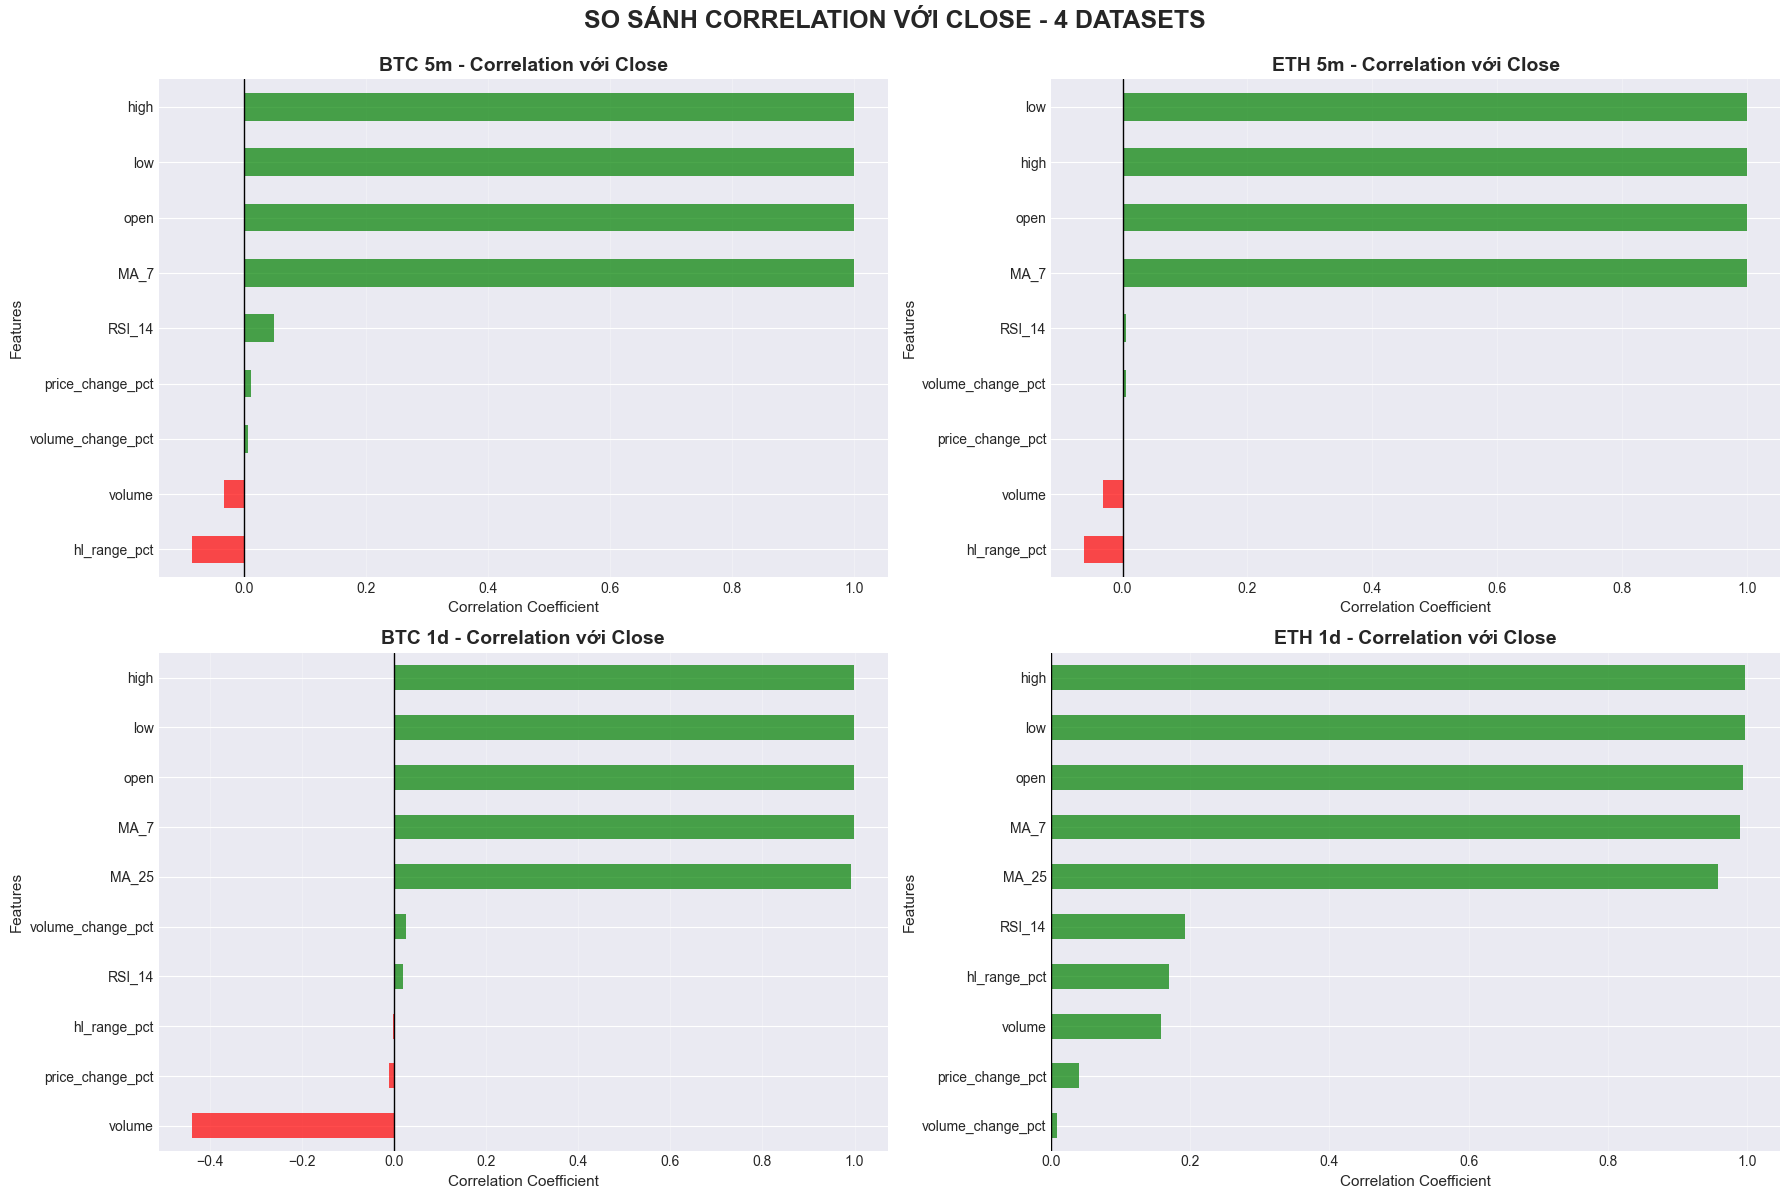

In [ ]:
# So sánh correlation với 'close' giữa 4 datasets
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

datasets = [
    ('BTC 5m', corr_btc_5m),
    ('ETH 5m', corr_eth_5m),
    ('BTC 1d', corr_btc_1d),
    ('ETH 1d', corr_eth_1d)
]

for idx, (name, corr_matrix) in enumerate(datasets):
    row = idx // 2
    col = idx % 2
    
    # Lấy correlation với close (bỏ chính nó)
    close_corr = corr_matrix['close'].drop('close').sort_values()
    
    # Vẽ barplot
    colors = ['red' if x < 0 else 'green' for x in close_corr]
    close_corr.plot(kind='barh', ax=axes[row, col], color=colors, alpha=0.7)
    
    axes[row, col].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[row, col].set_title(f'{name} - Correlation với Close', 
                             fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('Correlation Coefficient', fontsize=11)
    axes[row, col].set_ylabel('Features', fontsize=11)
    axes[row, col].grid(True, alpha=0.3, axis='x')

plt.suptitle('SO SÁNH CORRELATION VỚI CLOSE - 4 DATASETS', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()